<h1> Assignment #02 </h1>
<h3>by Sangjin Lee</h3>
Toronto Bike Share Database

In [24]:
# Required python package using Python 3.8.18 (Anaconda Virutal Environment)
# The one with classification look one in v28.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

# from sklearn import tree
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor

# from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import KFold, cross_val_score

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

In [25]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in Aug 2024.

df_Test = pd.read_csv('Ridership 2024-04.csv', encoding='latin-1')

print(df_Test.info())
print(df_Test.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403549 entries, 0 to 403548
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             403549 non-null  int64 
 1   Trip  Duration      403549 non-null  int64 
 2   Start Station Id    403549 non-null  int64 
 3   Start Time          403549 non-null  object
 4   Start Station Name  402853 non-null  object
 5   End Station Id      403549 non-null  int64 
 6   End Time            403549 non-null  object
 7   End Station Name    402713 non-null  object
 8   Bike Id             403549 non-null  int64 
 9   User Type           403549 non-null  object
 10  Model               403549 non-null  object
dtypes: int64(5), object(6)
memory usage: 33.9+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  27567494             307              7176  04/01/2024 00:00   
1  27567496             479              7169  04/01/2024 00:0

In [26]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in Aug 2024.

df_May = pd.read_csv('Ridership 2024-05.csv', encoding='latin-1')

print(df_May.info())
print(df_May.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685782 entries, 0 to 685781
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             685782 non-null  int64 
 1   Trip  Duration      685782 non-null  int64 
 2   Start Station Id    685782 non-null  int64 
 3   Start Time          685782 non-null  object
 4   Start Station Name  685748 non-null  object
 5   End Station Id      685782 non-null  int64 
 6   End Time            685782 non-null  object
 7   End Station Name    685744 non-null  object
 8   Bike Id             685782 non-null  int64 
 9   User Type           685782 non-null  object
 10  Model               685782 non-null  object
dtypes: int64(5), object(6)
memory usage: 57.6+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  28039944            2583              7633  05/01/2024 00:00   
1  28039945             666              7032  05/01/2024 00:0

In [27]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in Aug 2024.

df_Jun = pd.read_csv('Ridership 2024-06.csv', encoding='latin-1')

print(df_Jun.info())
print(df_Jun.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766068 entries, 0 to 766067
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             766068 non-null  int64 
 1   Trip  Duration      766068 non-null  int64 
 2   Start Station Id    766068 non-null  int64 
 3   Start Time          766068 non-null  object
 4   Start Station Name  761588 non-null  object
 5   End Station Id      766068 non-null  int64 
 6   End Time            766068 non-null  object
 7   End Station Name    761569 non-null  object
 8   Bike Id             766068 non-null  int64 
 9   User Type           766068 non-null  object
 10  Model               764132 non-null  object
dtypes: int64(5), object(6)
memory usage: 64.3+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  28829880             683              7109  06/01/2024 00:00   
1  28829881            1872              7526  06/01/2024 00:0

In [28]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in Aug 2024.

df_Jul = pd.read_csv("Ridership 2024-07.csv", encoding='latin-1')

print(df_Jul.info())
print(df_Jul.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903387 entries, 0 to 903386
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             903387 non-null  int64 
 1   Trip  Duration      903387 non-null  int64 
 2   Start Station Id    903387 non-null  int64 
 3   Start Time          903387 non-null  object
 4   Start Station Name  882724 non-null  object
 5   End Station Id      903387 non-null  int64 
 6   End Time            903387 non-null  object
 7   End Station Name    882170 non-null  object
 8   Bike Id             903387 non-null  int64 
 9   User Type           903387 non-null  object
 10  Model               900585 non-null  object
dtypes: int64(5), object(6)
memory usage: 75.8+ MB
None
    Trip Id  Trip  Duration  Start Station Id     Start Time  \
0  29706718             611              7199  7/1/2024 0:00   
1  29706719            3592              7242  7/1/2024 0:00   
2  2

Import Bikeshare ridership csv data file for August 2024

In [29]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in Aug 2024.

df_Aug = pd.read_csv('Ridership 2024-08.csv')

print(df_Aug.info())
print(df_Aug.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904925 entries, 0 to 904924
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             904925 non-null  int64 
 1   Trip  Duration      904925 non-null  int64 
 2   Start Station Id    904925 non-null  int64 
 3   Start Time          904925 non-null  object
 4   Start Station Name  876724 non-null  object
 5   End Station Id      904925 non-null  int64 
 6   End Time            904925 non-null  object
 7   End Station Name    876356 non-null  object
 8   Bike Id             904925 non-null  int64 
 9   User Type           904925 non-null  object
 10  Model               902542 non-null  object
dtypes: int64(5), object(6)
memory usage: 75.9+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  30751094             135              7066  08/01/2024 00:00   
1  30751095             897              7660  08/01/2024 00:0

Import Bikeshare ridership csv data file for September 2024

In [30]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in Sept 2024.

df_Sep = pd.read_csv('Ridership 2024-09.csv')

print(df_Sep.info())
print(df_Sep.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899615 entries, 0 to 899614
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             899615 non-null  int64 
 1   Trip  Duration      899615 non-null  int64 
 2   Start Station Id    899615 non-null  int64 
 3   Start Time          899615 non-null  object
 4   Start Station Name  868970 non-null  object
 5   End Station Id      899615 non-null  int64 
 6   End Time            899615 non-null  object
 7   End Station Name    868192 non-null  object
 8   Bike Id             899615 non-null  int64 
 9   User Type           899615 non-null  object
 10  Model               896444 non-null  object
dtypes: int64(5), object(6)
memory usage: 75.5+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  31797566             842              7933  09/01/2024 00:00   
1  31797567            2195              7075  09/01/2024 00:0

In [31]:
num_of_rows = len(df_Aug)
print(f"The number of rows in the dataset (August 2024) is {num_of_rows}")
num_of_rows = len(df_Sep)
print(f"The number of rows in the dataset (September 2024) is {num_of_rows}")

The number of rows in the dataset (August 2024) is 904925
The number of rows in the dataset (September 2024) is 899615


Combine two dataframes (August and September) into one dataframe

In [32]:
# https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/

# Combined two DataFrames by stacking them vertically (row-wise) using concat().

# Note that, by default, pd.concat() will stack rows, so the DataFrames would be stacked on top of each other row by row, 
# resulting in each DataFrame’s rows being added to the end of the other so each keeping its own default index values unless you set ignore_index=True.

# Combine using concat()
df = pd.concat([df_May, df_Jun, df_Jul, df_Aug, df_Sep], ignore_index=True)
display(df)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Model
0,28039944,2583,7633,05/01/2024 00:00,Noble St / Queen St W,7548,05/01/2024 00:43,St. Joseph St / Bay St - SMART,3227,Casual Member,ICONIC
1,28039945,666,7032,05/01/2024 00:00,Augusta Ave / Dundas St W,7163,05/01/2024 00:11,Yonge St / Wood St,3919,Casual Member,ICONIC
2,28039947,1574,7324,05/01/2024 00:00,King St W / Charlotte St,7237,05/01/2024 00:26,Ward St / Wallace Ave,5964,Casual Member,ICONIC
3,28039948,2650,7633,05/01/2024 00:00,Noble St / Queen St W,7548,05/01/2024 00:44,St. Joseph St / Bay St - SMART,640,Casual Member,ICONIC
4,28039949,635,7712,05/01/2024 00:00,Queen St W / Shaw St,7189,05/01/2024 00:11,Augusta Ave / Denison Sq,1111,Casual Member,ICONIC
...,...,...,...,...,...,...,...,...,...,...,...
4159772,32824170,1164,7017,09/30/2024 23:59,Widmer St / Adelaide St W - SMART,7693,10/01/2024 00:18,Mutual St / Shuter St (Arena Gardens),5090,Casual Member,ICONIC
4159773,32824171,1002,7713,09/30/2024 23:59,Temperance St / Bay St,7075,10/01/2024 00:16,Queens Quay W / Dan Leckie Way,6322,Casual Member,ICONIC
4159774,32824172,268,7168,09/30/2024 23:59,Queens Quay / Yonge St,7686,10/01/2024 00:04,Lower Jarvis St / The Esplanade,2928,Casual Member,ICONIC
4159775,32824174,241,7278,09/30/2024 23:59,Mallon Ave / Jones Ave -SMART,7705,10/01/2024 00:03,Colgate Ave / Carlaw Ave,1874,Casual Member,ICONIC


In [33]:
num_of_rows = len(df)
print(f"The number of rows in the dataset is {num_of_rows}")

The number of rows in the dataset is 4159777


Categorize by value counts based on the columns for each

In [34]:
# Print out all the columns for the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159777 entries, 0 to 4159776
Data columns (total 11 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Trip Id             int64 
 1   Trip  Duration      int64 
 2   Start Station Id    int64 
 3   Start Time          object
 4   Start Station Name  object
 5   End Station Id      int64 
 6   End Time            object
 7   End Station Name    object
 8   Bike Id             int64 
 9   User Type           object
 10  Model               object
dtypes: int64(5), object(6)
memory usage: 349.1+ MB
None


In [35]:
# By trip duration

print(df['Trip  Duration'].value_counts())

Trip  Duration
449       4221
455       4210
471       4201
510       4188
479       4186
          ... 
31907        1
487955       1
136421       1
49706        1
11591        1
Name: count, Length: 17211, dtype: int64


In [36]:
# By name of the starting station

print(df['Start Station Name'].value_counts())

# By ID of the starting station

# print(df['Start Station Id'].value_counts())

Start Station Name
York St / Queens Quay W                    33482
Bay St / College St (East Side)            28795
Bay St / Queens Quay W (Ferry Terminal)    26194
Union Station                              25080
Queens Quay / Yonge St                     24611
                                           ...  
Lindylou Rd / Lanyard Rd                      75
Trethewey Dr / Black Creek Dr                 75
Jane St / Lawrence Ave W                      68
Warehouse EBS-Station                          4
2 Church St                                    1
Name: count, Length: 807, dtype: int64


In [37]:
# By name of the ending station

print(df['End Station Name'].value_counts())

# By ID of the ending station

# print(df['End Station Id'].value_counts())

End Station Name
York St / Queens Quay W                    36433
King St W / Bay St (West Side)             32556
Union Station                              30232
Bay St / College St (East Side)            28704
Bay St / Queens Quay W (Ferry Terminal)    27232
                                           ...  
Trethewey Dr / Black Creek Dr                 70
Jane St / Lawrence Ave W                      46
Bike Shop Test Station                        17
2 Church St                                    8
Warehouse EBS-Station                          7
Name: count, Length: 808, dtype: int64


In [38]:
# By start time (Full date and time)

print(df['Start Time'].value_counts())

Start Time
7/24/2024 17:53     153
09/17/2024 17:07    123
09/17/2024 17:57    105
08/27/2024 17:35    103
09/18/2024 17:10    102
                   ... 
09/16/2024 03:17      1
09/16/2024 03:16      1
05/18/2024 06:31      1
09/16/2024 03:14      1
06/18/2024 02:34      1
Name: count, Length: 209554, dtype: int64


In [39]:
# By end time (Full date and time)

print(df['End Time'].value_counts())

End Time
09/10/2024 08:55    97
09/10/2024 18:27    94
09/11/2024 18:03    94
7/23/2024 17:29     94
09/17/2024 17:20    94
                    ..
06/12/2024 05:05     1
06/12/2024 04:52     1
06/12/2024 04:56     1
08/04/2024 05:56     1
09/09/2024 04:24     1
Name: count, Length: 209979, dtype: int64


In [40]:
# Type of the membership of Bikeshare

print(df['User Type'].value_counts())

User Type
Casual Member    3766366
Annual Member     393411
Name: count, dtype: int64


In [41]:
# By model type of the bike

print(df['Model'].value_counts())

Model
ICONIC     3440001
EFIT G5     468997
EFIT        240487
Name: count, dtype: int64


# Data Cleaning Stage

Copy/Duplicate the dataset (Unnecessary Steps)

In [42]:
new_df = df.copy()

Convert 'Start Time' into datetime type.<br />
Then created new column called 'Start Hour' where it record the hour.

In [43]:
new_df['Start Time'] = pd.to_datetime(new_df['Start Time'])
new_df['Start Hour'] = new_df['Start Time'].dt.hour

In [44]:
# Start Hour will record the hour in integer to indicate what time of the day has started.

print(new_df['Start Hour'].value_counts())

Start Hour
17    440054
18    385038
16    334621
19    306488
15    259011
8     250614
20    234837
14    226758
13    216917
12    206497
9     180191
21    179102
11    177697
10    155308
22    138128
7     126920
23    107725
0      61257
6      59060
1      37204
2      28889
5      21761
3      14881
4      10819
Name: count, dtype: int64


Do same for 'End Time' and its new column called 'End Hour'.

In [45]:
new_df['End Time'] = pd.to_datetime(new_df['End Time'])
new_df['End Hour'] = new_df['End Time'].dt.hour

In [46]:
print(new_df['End Hour'].value_counts())

End Hour
17    423533
18    400260
19    325445
16    310914
20    254313
15    249424
8     229824
14    220217
13    213036
9     200338
12    199017
21    196823
11    167355
10    150418
22    149019
23    120033
7     107307
0      71548
6      50086
1      41438
2      30847
5      19149
3      18275
4      11158
Name: count, dtype: int64


After the process, these are the result,

In [47]:
print(new_df.info())

num_of_rows = len(new_df)
print(f"NEW: The number of rows is {num_of_rows}")

num_of_rows = len(new_df)
print(f"OLD: The number of rows is {num_of_rows}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159777 entries, 0 to 4159776
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Trip Id             int64         
 1   Trip  Duration      int64         
 2   Start Station Id    int64         
 3   Start Time          datetime64[ns]
 4   Start Station Name  object        
 5   End Station Id      int64         
 6   End Time            datetime64[ns]
 7   End Station Name    object        
 8   Bike Id             int64         
 9   User Type           object        
 10  Model               object        
 11  Start Hour          int32         
 12  End Hour            int32         
dtypes: datetime64[ns](2), int32(2), int64(5), object(4)
memory usage: 380.8+ MB
None
NEW: The number of rows is 4159777
OLD: The number of rows is 4159777


Duplicate/Copy once more for next stage - Unnecessary Step<br />
Next step involves removing missing values and the duplicates.

In [48]:
new_df_2 = new_df.copy()

Removing the missing values from the dataset.

In [49]:
print(new_df_2.isnull().sum())

new_df_2.dropna(inplace = True)
# OR new_df_2 = new_df_2.dropna()

print(new_df_2.isnull().sum()) # OR df.isnull().sum()

Trip Id                   0
Trip  Duration            0
Start Station Id          0
Start Time                0
Start Station Name    84023
End Station Id            0
End Time                  0
End Station Name      85746
Bike Id                   0
User Type                 0
Model                 10292
Start Hour                0
End Hour                  0
dtype: int64
Trip Id               0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
Model                 0
Start Hour            0
End Hour              0
dtype: int64


Remove any duplicates from the dataset.
It should done in the missing values.

In [50]:
duplicate_rows = new_df_2.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [51]:
new_df_2.drop_duplicates(inplace = True)

In [52]:
duplicate_rows = new_df_2.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


Finally, after removing missing (and duplicated) values, the number of the row in the dataframe are following:

In [53]:
num_of_rows = len(new_df_2)
print(f"The number of rows is {num_of_rows}")

The number of rows is 3987409


Graph of the Trip Duration show that, some user used it for 0 to 1 seconds.

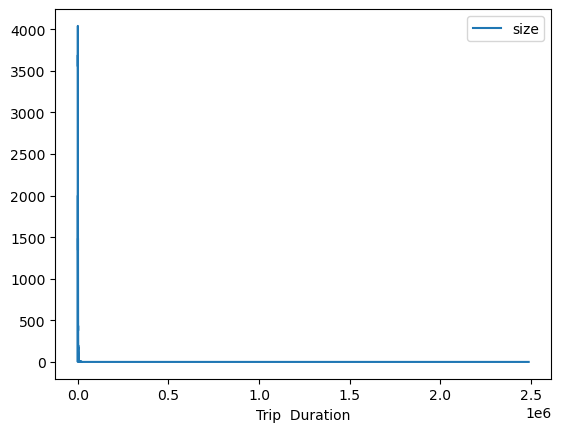

In [54]:
Trip_Duration_Grouped = new_df_2.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

In [55]:
# Noticed, that there are users who only used for 0 to 2 seconds.
# Assuming that they only use it to pick up and drop off instantly.

print(Trip_Duration_Plot.head(5))

                size
Trip  Duration      
0               1990
2               1598
4                  1
5                  1
8                  1


Therefore remove users who only use for 0 to 2 seconds.

In [56]:
new_df_3 = new_df_2.loc[new_df_2['Trip  Duration'] > 3] 
print("After cleaning user with 0 to 2 seconds, there are")
print(len(new_df_3))
print("Originally from "+str(len(new_df_2)))

After cleaning user with 0 to 2 seconds, there are
3983821
Originally from 3987409


# Initial Analysis Stage

The first portion organized based on the duration of the each trip.

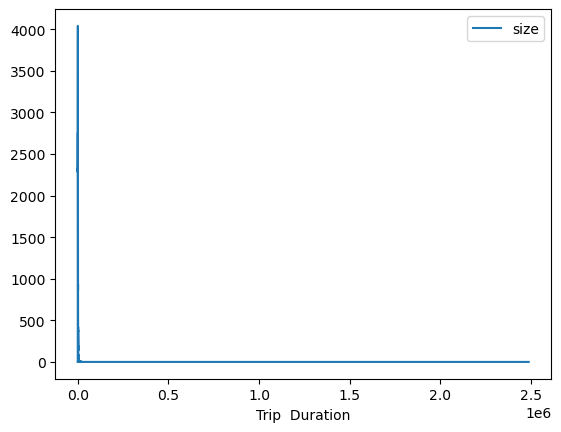

In [57]:
# Chart showing overall result.

Trip_Duration_Grouped = new_df_3.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

Number of users who used less than 1 minutes (60 seconds)

In [58]:
Trip_Duration_Below_1_df = new_df_3.loc[new_df_3['Trip  Duration'] < 60] 
print(len(Trip_Duration_Below_1_df))  # 757

1752


Number of users who used between one to ten minutes.

1599855


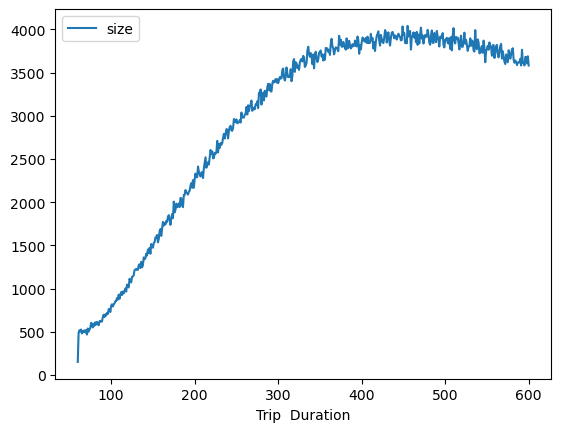

In [59]:
Trip_Duration_Below_10_df = new_df_3.loc[(new_df_3['Trip  Duration'] >= 60) & (new_df_3['Trip  Duration'] <= 600)] # Between one minutes (60) to ten minutes (600)
print(len(Trip_Duration_Below_10_df)) # 699030

Trip_Duration_Grouped = Trip_Duration_Below_10_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Peak

Number of users whose used bikeshare between 10 to 30 minutes.

1976834


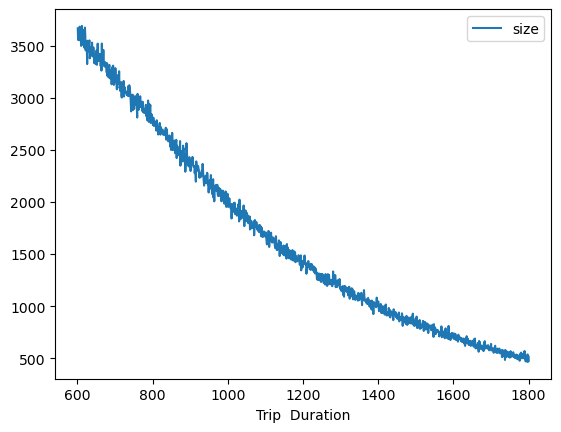

In [60]:
Trip_Duration_Below_30_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 600) &
                                   (new_df_3['Trip  Duration'] <= 1800)] 
print(len(Trip_Duration_Below_30_df)) # 833628

Trip_Duration_Grouped = Trip_Duration_Below_30_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Decreasing

Number of users whose use bikeshare between 30 minutes to 45 minutes.

236394


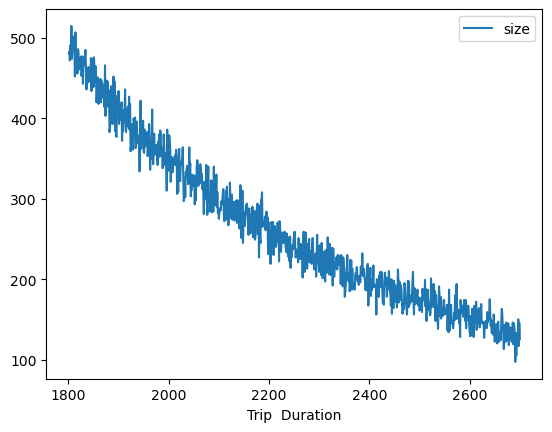

In [61]:
Trip_Duration_Below_45_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 1800) &
                                   (new_df_3['Trip  Duration'] <= 2700)] 
print(len(Trip_Duration_Below_45_df)) # 90631

Trip_Duration_Grouped = Trip_Duration_Below_45_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Constantly decreasing

Number of users who use bikeshare between 45 minutes to 90 minutes.

128923


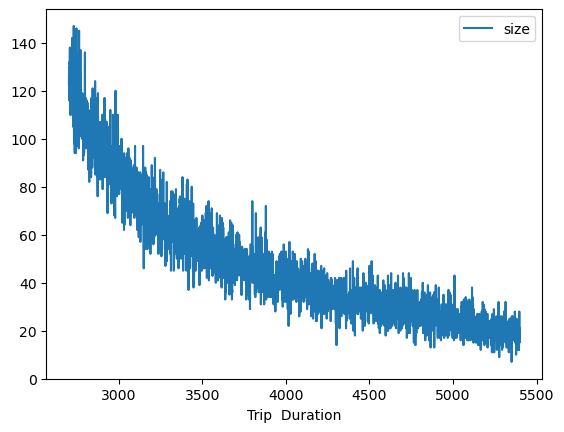

In [62]:
# Noticed that bikeshare do not usually allow to member to use more than 45 minutes.

Trip_Duration_Below_90_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 2700) &
                                   (new_df_3['Trip  Duration'] <= 5400)] 
print(len(Trip_Duration_Below_90_df)) # 47213

Trip_Duration_Grouped = Trip_Duration_Below_90_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

Number of users whose use more than 90.

19097


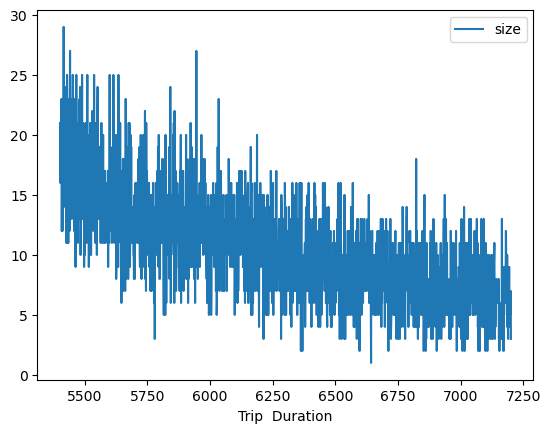

In [63]:
# More than 90 minutes but less than 120 minutes. (With graph)

Trip_Duration_Below_120_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 5400) &
                                   (new_df_3['Trip  Duration'] <= 7200)] 
print(len(Trip_Duration_Below_120_df)) # 6824

Trip_Duration_Grouped = Trip_Duration_Below_120_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

In [64]:
# Numbers of user who use more than 120 minutes.

Trip_Duration_Above_120_df = new_df_3.loc[new_df_3['Trip  Duration'] > 7200] 
print(len(Trip_Duration_Above_120_df)) # 7340

20966


Based on the overall result, the numbers of the peak users occurs between one minutes to 45 minutes period.

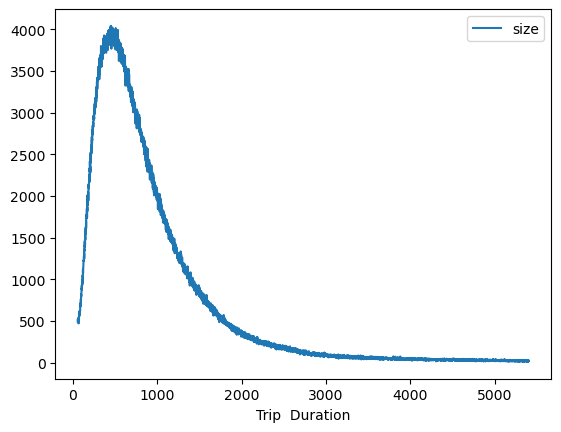

In [65]:
Trip_Duration_Overall_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 60) &
                                   (new_df_3['Trip  Duration'] <= 5400)] 

Trip_Duration_Grouped = Trip_Duration_Overall_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Most usage occurred between 1 ~ 30 minutes.

The 'Start Hour' and 'End Hour' used to predict amount of user that use during specific time of the day.

Graph for hour of period who pick up the bike. 8am and 5pm are the peak hours to picking up the bike.

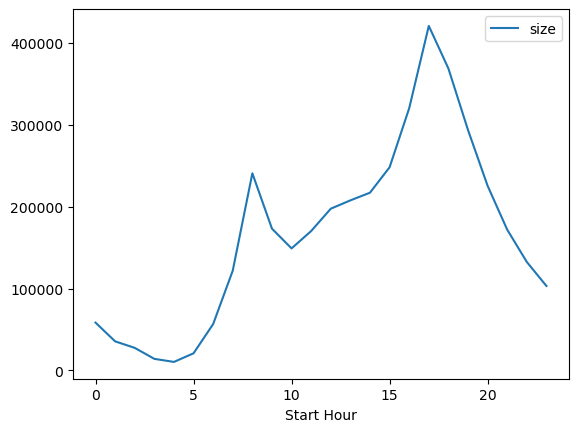

In [66]:
Start_Hour_Grouped = new_df_3.groupby(['Start Hour'])

Start_Hour_Plot = Start_Hour_Grouped['Start Hour'].agg([np.size])
# print(Start_Hour_Plot) # Hour start from 0 (12am) to 23 (11pm)

Start_Hour_Plot.plot()

plt.show()

Graph for hour of period who drop off the bike. 9am and 6 to 7pm are the peak hours to drop off the bike.

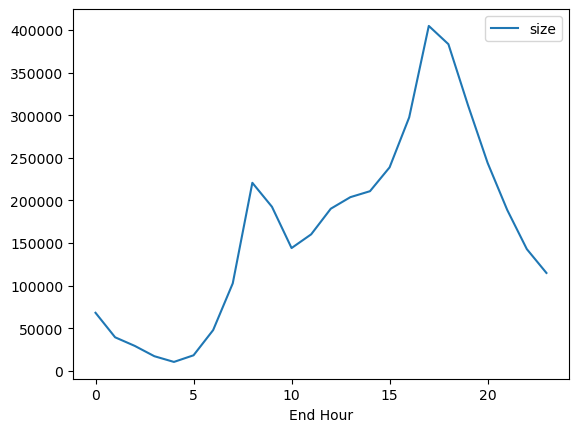

In [67]:
End_Hour_Grouped = new_df_3.groupby(['End Hour'])

End_Hour_Plot = End_Hour_Grouped['End Hour'].agg([np.size])
# print(End_Hour_Plot) # Hour start from 0 (12am) to 23 (11pm)

End_Hour_Plot.plot()

plt.show()

For most user bike share station, Downtown Bike Stations the most use station for pick up. Outside of Downtown are the least bike stations that are being used. 

In [68]:
Start_Station_Grouped = new_df_3.groupby(['Start Station Name'])

Start_Station_Plot = Start_Station_Grouped['Start Station Name'].size().sort_values(ascending=False)

In [69]:
print("Top 25 Bike Start Station")
print(Start_Station_Plot.head(25)) # Mostly Downtown

Top 25 Bike Start Station
Start Station Name
York St / Queens Quay W                    32538
Bay St / College St (East Side)            28321
Bay St / Queens Quay W (Ferry Terminal)    25609
Union Station                              24162
Queens Quay / Yonge St                     24009
College St / Major St                      22927
Bay St / Wellesley St W                    22850
King St W / Portland St                    21429
Queen St W / John St                       21415
Baldwin St / Spadina Ave - SMART           19759
College St / Markham St                    19753
Widmer St / Adelaide St W - SMART          19460
Fort York  Blvd / Capreol Ct               19365
Dundas St W / Crawford St                  18447
College St / Huron St                      18282
Bathurst St / Front St W                   18276
King St W / Charlotte St                   18131
Richmond St E / Yonge St                   18126
College Park - Yonge St Entrance           18102
Dundas St W / Yonge St  

In [70]:
print("\nBottom 10 Bike Start Station")
print(Start_Station_Plot.tail(10)) # Mostly outside of Downtown


Bottom 10 Bike Start Station
Start Station Name
75 Tandridge Cres                93
Jane St / Yorkwoods Gt           82
Trethewey Dr / Jane St           81
Tangiers Rd / Finch Ave W        81
Oakdale Community Centre         80
Lindylou Rd / Lanyard Rd         75
Trethewey Dr / Black Creek Dr    73
Jane St / Lawrence Ave W         67
Warehouse EBS-Station             4
2 Church St                       1
Name: Start Station Name, dtype: int64


For most user bike share station, Downtown Bike Stations the most use station for drop off as well. Aside from maintaince yard, outside of Downtown Bike Stations are the least use station for drop off as well.

In [71]:
End_Station_Grouped = new_df_3.groupby(['End Station Name'])

End_Station_Plot = End_Station_Grouped['End Station Name'].size().sort_values(ascending=False) # .agg([np.size])

In [72]:
print("Top 25 Bike End Station")
print(End_Station_Plot.head(25)) # Mostly Downtown

Top 25 Bike End Station
End Station Name
York St / Queens Quay W                          35425
King St W / Bay St (West Side)                   31813
Union Station                                    29008
Bay St / College St (East Side)                  28219
Bay St / Queens Quay W (Ferry Terminal)          26559
Queens Quay / Yonge St                           25317
College St / Major St                            23165
King St W / Portland St                          21931
Queen St W / John St                             21913
Baldwin St / Spadina Ave - SMART                 20144
Dundas St W / Crawford St                        20051
Bathurst St/Queens Quay(Billy Bishop Airport)    20009
College St / Markham St                          20002
Widmer St / Adelaide St W - SMART                19750
Dundas St W / Yonge St                           19003
University Ave / Gerrard St W (East Side)        18957
Fort York  Blvd / Capreol Ct                     18847
Temperance St Station   

In [73]:
print("\nBottom 10 Bike End Station")
print(End_Station_Plot.tail(10)) # Except for Warehouse, outside of Downtown


Bottom 10 Bike End Station
End Station Name
75 Tandridge Cres                83
Trethewey Dr / Jane St           78
Jane St / Yorkwoods Gt           74
Lindylou Rd / Lanyard Rd         72
Tangiers Rd / Finch Ave W        72
Trethewey Dr / Black Creek Dr    68
Jane St / Lawrence Ave W         45
2 Church St                       8
Warehouse EBS-Station             6
Bike Shop Test Station            2
Name: End Station Name, dtype: int64


- K-Fold validation on the dataset given.

<h1>10 fold cross-validation with Training/Validation Set</h1>

- First do ten (k-fold) Cross-validation on the training(/validaiton)set<br />
- Second do the testing the models on the test set<br />
- For spliting Training and testing models, 99.94% of dataset will be using as training 0.05% validation and remaining 0.01% of dataset will beusing as test set.

In [74]:
# The data will do cross-validation and SVM will be done using Overall dataset generated in the previous steps.

new_df_5 = Trip_Duration_Overall_df.copy()

In [75]:
# X will be all the columns except for Trip Id, Trip Duration, name of Start/End Station, and date.
features = ['Start Station Id','End Station Id','Start Hour','End Hour']

X = new_df_5.loc[:, features]
y = new_df_5.loc[:, ['Trip  Duration']]

All required modules

In [76]:
# from sklearn import tree
# from sklearn.model_selection import train_test_split
# # from sklearn.tree import DecisionTreeRegressor

# from sklearn.linear_model import SGDClassifier

# from sklearn.model_selection import KFold, cross_val_score

Spliting Train/Validation Set and Test Set

In [77]:
# Split Train(/Validaiton) and Test Set

# Due to processing power, the data is divided into validation, training, and testing set instead.
# Both validation and testing set will be divided into 0.05% and 0.01% respectively.
# Original plan is to divide 70% of training and 30% of testing.

# https://medium.com/@kavyasree42/best-practices-for-train-test-split-407089e2917a

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, random_state=0, test_size = .0001)

X_val, X_train, y_val, y_train = train_test_split(X_train_temp, y_train_temp, random_state=0, train_size = .0005)

Do ten fold

In [78]:
# Step necessary to do cross-validation

k_folds = KFold(n_splits = 10)

Using the 10 fold cross validation with "Linear Regression"

In [79]:
# from sklearn import linear_model

# https://www.geeksforgeeks.org/linear-regression-python-implementation/

# Create linear regression model
linear_reg = linear_model.LinearRegression()

# Fit the model for Linear Regression
linear_reg.fit(X_val, y_val)

# Apply k Fold cross validation
linear_scores = cross_val_score(linear_reg, X_val, y_val, cv = k_folds)

print("Cross Validation Scores: ", linear_scores)
print("Average CV Score: ", linear_scores.mean())
print("Number of CV Scores used in Average: ", len(linear_scores)) 

# Performing predictions on the test dataset
y_pred_linear = linear_reg.predict(X_test)

Cross Validation Scores:  [ 0.01352125 -0.01054197  0.00871714  0.01556474 -0.01990916 -0.0149667
  0.02569971  0.00213847 -0.03237142  0.02920717]
Average CV Score:  0.0017059230893478605
Number of CV Scores used in Average:  10


Using the 10 fold cross validation with "Decision Tree Regressor"

In [80]:
# from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regressor
decision_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)

# Fit the model for Decision Tree Regression
decision_reg.fit(X_val, y_val)

# Apply k Fold cross validation
decision_reg_score = cross_val_score(decision_reg, X_val, y_val, cv = k_folds)

print("Cross Validation Scores: ", decision_reg_score)
print("Average CV Score: ", decision_reg_score.mean())
print("Number of CV Scores used in Average: ", len(decision_reg_score)) 

# Performing predictions on the test dataset
y_pred_decision_reg = decision_reg.predict(X_test)

Cross Validation Scores:  [-0.00712068 -0.03748102  0.00090033 -0.00353938 -0.01424214 -0.01553227
  0.008711    0.00220175 -0.00292857  0.01654161]
Average CV Score:  -0.005248936273591909
Number of CV Scores used in Average:  10


Using the 10 fold cross validation with "Random Forest Regressor"

In [81]:
# https://www.geeksforgeeks.org/random-forest-regression-in-python/

# from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
rf_regressor.fit(X_val, y_val)

# Apply k Fold cross validation
rf_reg_scores = cross_val_score(rf_regressor, X_val, y_val, cv = k_folds)

print("Cross Validation Scores: ", rf_reg_scores)
print("Average CV Score: ", rf_reg_scores.mean())
print("Number of CV Scores used in Average: ", len(rf_reg_scores)) 

# Performing predictions on the test dataset
y_pred_rf_reg = rf_regressor.predict(X_test)

Cross Validation Scores:  [ 0.03378462 -0.08516041  0.01607346 -0.03367721 -0.03634248  0.01507573
 -0.12225271  0.03015073  0.01926906 -0.00071402]
Average CV Score:  -0.016379321668781543
Number of CV Scores used in Average:  10


<h1>Support Vector Machine Stage using Regression</h1>

Support Vector Machine for Regression (Using linear kernel)

In [82]:
# https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/
# https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/

# Import svr "Support Vector Regression" model
# from sklearn.svm import SVR

# Create an SVR Model with a Linear Kernel
svr_regressor = SVR(kernel = 'linear')

# Train the model using the Training/Validation dataset 
svr_regressor.fit(X_val, y_val)

# make predictions for Test dataset
y_pred_svr_regressor = svr_regressor.predict(X_test) 

<h1>Evaluate model</h1>

In [83]:
# https://www.geeksforgeeks.org/step-by-step-guide-to-calculating-rmse-using-scikit-learn/

# from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_svr_regressor)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 555378.6143933034


In [84]:
# https://www.askpython.com/python/examples/mape-mean-absolute-percentage-error

# from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_svr_regressor)
print(f"Mean absolute error: {mae}")

Mean absolute error: 485.31936400460916


In [85]:
# https://discovery.cs.illinois.edu/guides/Statistics-with-Python/rmse/

rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr_regressor)) # np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 745.2372873074074


In [86]:
# https://www.statology.org/r-squared-in-python/

# from sklearn.linear_model import LinearRegression

# #initiate linear regression model
# model = LinearRegression()

# #define predictor and response variables
# X, y = df[["hours", "prep_exams"]], df.score

# #fit regression model
# model.fit(X, y)

#calculate R-squared of regression model
r_squared = svr_regressor.score(X_test, y_test) 
r_squared2 = linear_reg.score(X_test, y_test) # model

#view R-squared value
print(f"The R-squared the (linear svr) model turns out to be {r_squared}")
print(f"The R-squared the (linear regression) model turns out to be {r_squared2}")

The R-squared the (linear svr) model turns out to be -0.052021434320045135
The R-squared the (linear regression) model turns out to be 0.021926732368696245


In [87]:
# https://www.kaggle.com/code/ilhansevval/regression-analysis-knn-svm-decision-tree

average_mse = np.mean(mse)
std_mse = np.std(mse)
average_mae = np.mean(mae)
std_mae = np.std(mae)
average_rmse = np.mean(rmse)
std_rmse = np.std(rmse)
average_r_squared = np.mean(r_squared)
std_r_squared = np.std(r_squared)


print(f"Average MSE: {average_mse}, Std: {std_mse}")
print(f"Average MAE: {average_mae}, Std: {std_mae}")
print(f"Average RMSE: {average_rmse}, Std: {std_rmse}")
print(f"Average R-squared: {average_r_squared}, Std: {std_r_squared}")

Average MSE: 555378.6143933034, Std: 0.0
Average MAE: 485.31936400460916, Std: 0.0
Average RMSE: 745.2372873074074, Std: 0.0
Average R-squared: -0.052021434320045135, Std: 0.0
